## Observations and Insights

## Dependencies and starter code

In [257]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [258]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=[]
median=[]
variance=[]
st_dev=[]
SEM=[]

regimen_list=frames['Drug Regimen'].unique()
for regimen in regimen_list: 
    df_regimen = df.loc[df['Drug Regimen']==regimen]
    
    mean.append(df_regimen['Tumor Volume (mm3)'].mean())
    median.append(df_regimen['Tumor Volume (mm3)'].median())
    variance.append(st.tvar(df_regimen['Tumor Volume (mm3)']))
    st_dev.append(st.tstd(df_regimen['Tumor Volume (mm3)']))
    SEM.append(st.sem(df_regimen['Tumor Volume (mm3)']))
    
df_stats=pd.DataFrame(
    {"Drug Regimen": regimen_list,
     "Mean vol": mean,
     "Median vol": median,
     "Variance of vol": variance,
     "StDev of vol": st_dev,
     "SEM of vol": SEM
    })

df_stats.set_index('Drug Regimen')
 

,Mean vol,Median vol,Variance of vol,StDev of vol,SEM of vol
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884


## Bar plots

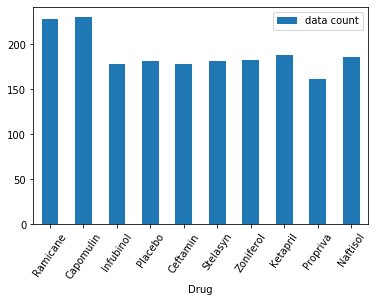

In [259]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points=[]
for regimen in regimen_list: 
    df_regimen = df.loc[df['Drug Regimen']==regimen]
    data_points.append(len(df_regimen))
    
x_axis=[]
for i in range(len(data_points)):
    x_axis.append(i)


bar_plot = pd.DataFrame({'Drug':regimen_list, 'data count':data_points})
ax = bar_plot.plot.bar(x='Drug', y='data count', rot=55)

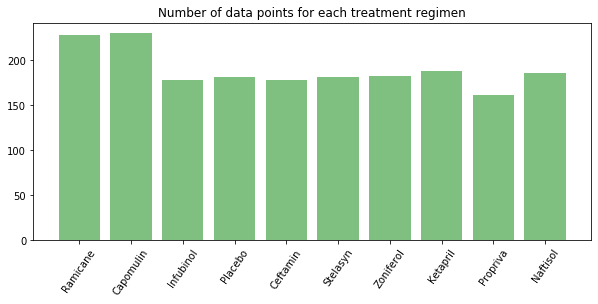

In [260]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,4))
plt.bar(x_axis, data_points, color='g', alpha=0.5, align="center")
plt.xticks(x_axis, regimen_list, rotation=55)
plt.title("Number of data points for each treatment regimen")
plt.show()

## Pie plots

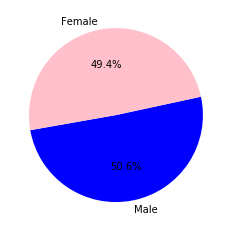

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = ["Male", "Female"]
gender_count=[]
for gender in genders:
    df_genders = df.loc[df['Sex']==gender]
    gender_count.append(len(df_genders))
gender_count

df_gender = pd.DataFrame({'': gender_count},
                         index=genders)
plot = df_gender.plot.pie(y='', figsize=(4, 4), colors=colors,  startangle=190,
        autopct="%1.1f%%", legend=False)

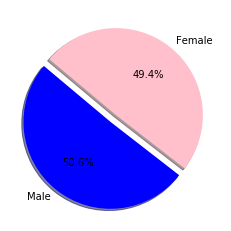

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "pink"]
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, outliers and boxplots

In [295]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
promising_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
mice = df["Mouse ID"].unique()

for mouse in mice:
    df_mouse = df.loc[df['Mouse ID']==mouse]
    for regimen in promising_regimen: 
        df_promising_regimen = df_mouse.loc[df_mouse['Drug Regimen']==regimen]
        
       
    






    


In [293]:
[1863    45.000000
1864    49.273092
1865    50.478750
1866    51.196304
1867    51.807944
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451]

SyntaxError: invalid syntax (<ipython-input-293-e0d13e763182>, line 1)

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen